In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Configurations
file_path = r'C:\Users\Admin\Travel_Insurane_Claim_Status.xlsx'

A third-party travel insurance servicing company that is based in Singapore wants to know for any insurance policy, whether some features lead to the policy claimed.The goal of this project is to predict whether insurance policies are claimed based on some of the features.

In [5]:
#Reading the input
df = pd.read_excel(file_path)

In [6]:
#Creating a copy of data to work with
customer_data=df.copy()
customer_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


Data Wrangling-step1(Check for missing values)-delete columns with more than 50 percent null values.

In [7]:
#Find the percentage of missing data in each column.and remove the column 
#with more than 50 percent missing data.
customer_data=customer_data.loc[:,customer_data.isnull().mean()<0.5]

In [8]:
#Converting claim to numerical column
customer_data['Claim']=np.where(customer_data['Claim']=='No',0,1)

In [65]:
#This is to set the datetime columns dtypes to datetime.Ignore this if there is no datetime column in the data
for col in customer_data.columns:
    customer_data = customer_data.apply(lambda col: pd.to_datetime(col, errors='ignore') 
              if col.dtypes == object 
              else col, 
              axis=0)

Lets do train test split before starting with imputation techniques.

In [9]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(customer_data, customer_data.Claim, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((44328, 10), (18998, 10))

# 1.Feature Engineering of all continuous variables

In [36]:
#Imputation of other continuous columns with less than 50 percent missing values with mean or median
Numerical_columns=X_train.select_dtypes(include='number').columns

# Null value imputation.

In [168]:
def impute_na(df, variable, median,mean):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0) 
    df[variable+'_mean'] = df[variable].fillna(mean) 
    # random sampling
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    print(variable +' Original Standard Deviation: ', df[variable].std())
    print(variable +' Standard Deviation after median imputation: ', df[variable+'_median'].std())
    print(variable +' Standard Deviation after zero imputation: ', df[variable+'_zero'].std())
    print(variable +' Standard Deviation after random imputation: ', df[variable+'_random'].std())
    print(variable +' Standard Deviation after mean imputation: ', df[variable+'_mean'].std())

In [181]:
#Used to analyze the missingness of data
def impute_na_arbit(df,variable):
    df[variable+'_na'] = np.where(df[variable].isnull(), 1, 0)
    df[variable+'_tens'] = np.where(df[variable+'_na']==1, 10, df[variable])
    df[variable+'_hundereds'] = np.where(df[variable+'_na']==1,100,df[variable])
    print(variable +' Original Standard Deviation: ', df[variable].std())
    print(variable +' Standard Deviation after random imputation with ten: ', df[variable+'_tens'].std())
    print(variable +' Standard Deviation after random imputation with hundred: ', df[variable+'_hundereds'].std())

In [186]:
def impute_na_extreme(df, variable, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    print(variable +' Original Standard Deviation: ', df[variable].std())
    print(variable +' Standard Deviation after random imputation with extreme values: ', df[variable+'_far_end'].std())

1.Mean,median,zero and random imputation of null values.

In [182]:
for cols in Numerical_columns:
    mean=X_train[cols].mean()
    median=X_train[cols].median()
    if (X_train[cols].isnull().sum())>0:
        impute_na(X_train,cols,median,mean)
    if (X_test[cols].isnull().sum())>0:
        impute_na(X_test,cols,median,mean)


Duration Original Standard Deviation:  109.14490025073316
Duration Standard Deviation after median imputation:  109.14374679562509
Duration Standard Deviation after zero imputation:  109.14392148670473
Duration Standard Deviation after random imputation:  109.14373156390202
Duration Standard Deviation after mean imputation:  109.14366911039178
Duration Original Standard Deviation:  82.08762392734958
Duration Standard Deviation after median imputation:  82.08569828798204
Duration Standard Deviation after zero imputation:  82.08623534138502
Duration Standard Deviation after random imputation:  82.08605809295992
Duration Standard Deviation after mean imputation:  82.08546339601261


<ipython-input-168-38c497150cb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_median'] = df[variable].fillna(median)
<ipython-input-168-38c497150cb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_zero'] = df[variable].fillna(0)
<ipython-input-168-38c497150cb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

2. Adding a variable to capture NA

In [183]:
for cols in Numerical_columns:
    if (X_train[cols].isnull().sum())>0:
        impute_na_arbit(X_train,cols)
    if (X_test[cols].isnull().sum())>0:
        impute_na_arbit(X_test,cols)

Duration Original Standard Deviation:  109.14490025073316
Duration Standard Deviation after random imputation with ten:  109.14382968021782
Duration Standard Deviation after random imputation with hundred:  109.14393353325019
Duration Original Standard Deviation:  82.08762392734958
Duration Standard Deviation after random imputation with ten:  82.08595275200945
Duration Standard Deviation after random imputation with hundred:  82.08629504026958


<ipython-input-181-aeb60702971d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_na'] = np.where(df[variable].isnull(), 1, 0)
<ipython-input-181-aeb60702971d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_tens'] = np.where(df[variable+'_na']==1, 10, df[variable])
<ipython-input-181-aeb60702971d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

3.Imputation with value at the far end of the distribution

In [187]:
for cols in Numerical_columns:
    if (X_train[cols].isnull().sum())>0:
        impute_na_extreme(X_train, cols, X_train[cols].mean()+3*X_train[cols].std())
    if (X_test[cols].isnull().sum())>0:
        impute_na_extreme(X_test, cols, X_train[cols].mean()+3*X_train[cols].std())

Duration Original Standard Deviation:  109.14490025073316
Duration Standard Deviation after random imputation with extreme values:  109.15474862363294
Duration Original Standard Deviation:  82.08762392734958
Duration Standard Deviation after random imputation with extreme values:  82.11990447613067


<ipython-input-186-e1af88914098>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_far_end'] = df[variable].fillna(extreme)


# Handling outliers

Check for distribution of variable before going to the outlier imputation.

In [194]:
Numerical_columns

Index(['Claim', 'Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

<AxesSubplot:ylabel='Age'>

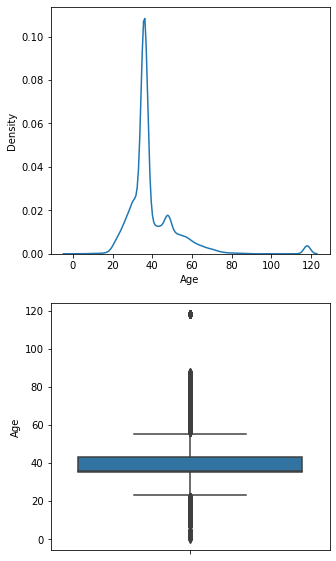

In [202]:
plt.subplots(2,1 ,figsize = (5,10))
plt.subplot(211)
sns.kdeplot(X_train.Age)
plt.subplot(212)
sns.boxplot(y='Age', data=X_train)

<AxesSubplot:ylabel='Commision (in value)'>

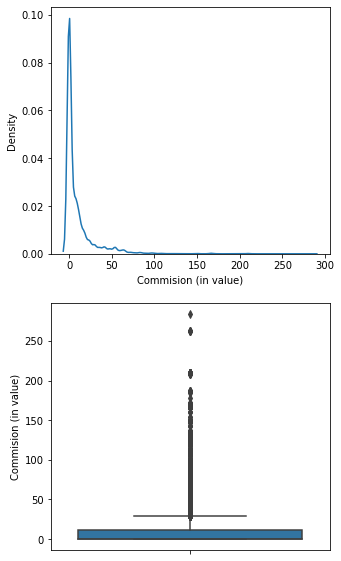

In [203]:
plt.subplots(2,1 ,figsize = (5,10))
plt.subplot(211)
sns.kdeplot(X_train['Commision (in value)'])
plt.subplot(212)
sns.boxplot(y='Commision (in value)', data=X_train)

<AxesSubplot:ylabel='Net Sales'>

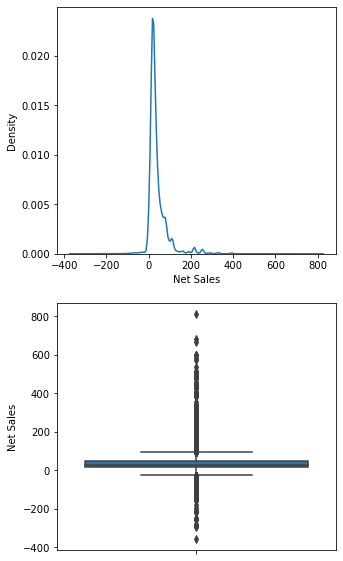

In [204]:
plt.subplots(2,1 ,figsize = (5,10))
plt.subplot(211)
sns.kdeplot(X_train['Net Sales'])
plt.subplot(212)
sns.boxplot(y='Net Sales', data=X_train)

<AxesSubplot:ylabel='Duration'>

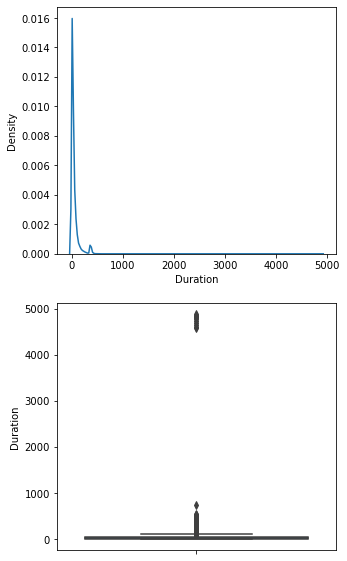

In [205]:
plt.subplots(2,1 ,figsize = (5,10))
plt.subplot(211)
sns.kdeplot(X_train['Duration'])
plt.subplot(212)
sns.boxplot(y='Duration', data=X_train)

All the numeric columns have a non-normal distribution.

In [206]:
#Treating outliers with zero coding-Any value less than zero will be made zero
def outliers_ZeroCoding(X,variable):
    X.loc[X[variable]<0, variable] = 0 

# Outlier imputation-Non-normal distribution

In [209]:
#Treating outliers with top coding-Any value greater than maximum limit will be capped at maximum
def outliers_TopCoding_quantile(X_train,X_test,variable):
    # top coding: upper boundary for outliers according to interquantile proximity rule
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)
    Upper_fence = X_train[variable].quantile(0.75) + (IQR * 3)
    X_train.loc[X_train[variable]>Upper_fence, variable] = Upper_fence
    X_test.loc[X_test[variable]>Upper_fence, variable] = Upper_fence

In [210]:
#Treating outliers with top coding-Any value less than minimum limit will be capped at minimum
def outliers_BottomCoding_quantile(X_train,X_test,variable):
    # bottom coding: lower boundary for outliers according to interquantile proximity rule
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)
    Lower_fence = X_train[variable].quantile(0.25) - (IQR * 3)
    X_train.loc[X_train[variable]<Lower_fence, variable] = Lower_fence
    X_test.loc[X_test[variable]<Lower_fence, variable] = Lower_fence 
    

In [216]:
for cols in Numerical_columns:
    outliers_TopCoding_quantile(X_train,X_test,cols)
    outliers_BottomCoding_quantile(X_train,X_test,cols)
   

# Outlier imputation-normal distribution

In [207]:
#Treating outliers with top coding-Any value greater than maximum limit will be capped at maximum
def outliers_TopCoding_gaussian(X_train,X_test,variable):
    # top coding: upper boundary for outliers according to gaussian rule
    Upper_fence = X_train[variable].mean()+3*X_train[variable].std()
    X_train.loc[X_train[variable]>Upper_fence, variable] = Upper_fence
    X_test.loc[X_test[variable]>Upper_fence, variable] = Upper_fence

In [208]:
#Treating outliers with top coding-Any value less than minimum limit will be capped at minimum
def outliers_BottomCoding_gaussian(X_train,X_test,variable):
    # bottom coding: lower boundary for outliers according to gaussian rule
    Lower_fence = X_train[variable].mean()-3*X_train[variable].std()
    X_train.loc[X_train[variable]<Lower_fence, variable] = Lower_fence
    X_test.loc[X_test[variable]<Lower_fence, variable] = Lower_fence 
    

Next step will be to convert these non-normal distribution to normal.

# Gaussian Transformation

In [227]:
def transform_BoxCox(X_train,X_test,variable):
    X_train[variable+'_boxcox'], param = stats.boxcox(X_train[variable])
    X_test[variable+'_boxcox'], param = stats.boxcox(X_test[variable])
    print('Optimal lambda: ', param)

In [ ]:
for cols in Numerical_columns:
    transform_BoxCox(X_train,X_test,cols)
    


# Discretisation

1.Equal frequency discretisation

In [39]:
def disc_EqualFreq(X_train,X_test,variable):
    # create 10 labels, one for each quantile
    labels = ['Q'+str(i+1) for i in range(0,10)]
    # bins with labels
    # precision=3 means up to 3 places of decimal
    #X_train[variable+'_disc_label'], bins = pd.qcut(x=X_train[variable], q=10, retbins=True, precision=3, duplicates='drop')
    # bins with boundaries
    X_train[variable+'_disc'], bins = pd.qcut(x=X_train[variable], q=10, retbins=True, precision=3, duplicates='drop')
    #X_test[variable+'_disc_label'] = pd.cut(x = X_test.Age, bins=bins)
    X_test[variable+'_disc'] = pd.cut(x = X_test.Age, bins=bins)
    

2.Equal width discretisation

In [35]:
def disc_EqualWidth(X_train,X_test,variable):
    # now let's capture the lower and upper boundaries
    min_value = int(np.floor(X_train[variable].min()))
    max_value = int(np.ceil(X_train[variable].max()))
    range_value = max_value - min_value
    # let's round the bin width
    inter_value = int(np.round(range_value/10))
    intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
    labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
    # create one column with labels
    X_train[variable+'_disc_label'] = pd.cut(x = X_train[variable], bins=intervals, labels=labels, include_lowest=True)
    # and one with bin boundaries
    X_train[variable+'_disc'] = pd.cut(x = X_train[variable], bins=intervals, include_lowest=True)
    X_test[variable+'_disc_label'] = pd.cut(x = X_test[variable], bins=intervals, labels=labels, include_lowest=True)
    X_test[variable+'_disc'] = pd.cut(x = X_test[variable], bins=intervals, include_lowest=True)

In [37]:
#Use any of the above 2 methods the for loop of all numerical columns
for cols in Numerical_columns:
    disc_EqualFreq(X_train,X_test,cols)

# Feature Scaling

Algorithms that require explicit feature  are
  Linear and Logistic Regression
  Neural Networks
  Support Vector Machines
  KNN
  K-means clustering
  Linear Discriminant Analysis (LDA)
  Principal Component Analysis (PCA)

1.Standard Scalar:  z = (x - x_mean) / std

In [45]:
def scaler_Standard(X_train,X_test):
    # the scaler - for standardisation
    from sklearn.preprocessing import StandardScaler
    # set up the scaler
    scaler = StandardScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(X_train)
    # transform train and test sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # let's transform the returned NumPy arrays to dataframes 
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    return X_train_scaled,X_test_scaled

2.Mean Normalisation: z=(x-x_mean)/(x_max-x_min)

In [48]:
def scaler_MeanNormalisation(X_train,X_test):
    means = X_train.mean(axis=0)
    ranges = X_train.max(axis=0)-X_train.min(axis=0)
    X_train_scaled = (X_train - means) / ranges
    X_test_scaled = (X_test - means) / ranges
    return X_train_scaled,X_test_scaled

3.MinMaxScaling:x_scaled=(x-x_min)/(x_max-x_min)

In [49]:
def scaler_MinMax(X_train,X_test):
    # the scaler - for min-max scaling
    from sklearn.preprocessing import MinMaxScaler
    # set up the scaler
    scaler = MinMaxScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(X_train)
    # transform train and test sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # let's transform the returned NumPy arrays to dataframes 
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    return X_train_scaled,X_test_scaled

4.MaxAbsScaling:x_scaled=x/x_max

In [50]:
def scaler_MaxAbs(X_train,X_test):
    # the scaler - for min-max scaling
    from sklearn.preprocessing import MaxAbsScaler
    # set up the scaler
    scaler = MaxAbsScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(X_train)
    # transform train and test sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # let's transform the returned NumPy arrays to dataframes 
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    return X_train_scaled,X_test_scaled

5.RobustScaling:X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

In [51]:
def scaler_Robust(X_train,X_test):
    # the scaler - for min-max scaling
    from sklearn.preprocessing import RobustScaler
    # set up the scaler
    scaler = RobustScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(X_train)
    # transform train and test sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # let's transform the returned NumPy arrays to dataframes 
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    return X_train_scaled,X_test_scaled

In [55]:
X_train.loc[:,['Net Sales','Commision (in value)','Age','Duration']]

,Net Sales,Commision (in value),Age,Duration
62988,216.0,54.00,57,365
51258,10.0,0.00,33,4
17742,22.0,7.70,26,19
49241,112.0,0.00,59,20
57537,16.0,4.00,28,8
...,...,...,...,...
45891,30.0,0.00,36,14
52416,79.2,47.52,47,17
42613,30.0,10.50,50,64
43567,36.0,0.00,36,51


Call any of the above five methods to do feature scaling

In [56]:
X_train_scaled,X_test_scaled=scaler_Robust(X_train.loc[:,['Net Sales','Commision (in value)','Age','Duration']],X_train.loc[:,['Net Sales','Commision (in value)','Age','Duration']])

In [57]:
X_train_scaled.head()

,Net Sales,Commision (in value),Age,Duration
0,6.316667,4.675325,2.625,7.795455
1,-0.550000,0.000000,-0.375,-0.409091
2,-0.150000,0.666667,-1.250,-0.068182
3,2.850000,0.000000,2.875,-0.045455
4,-0.350000,0.346320,-1.000,-0.318182


# 2.Feature Engineering of all categorical values

# Null value imputation

In [236]:
def impute_na_freq(X_train, X_test, variable):
    # find out most frequent category
    most_frequent_category = X_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0] 
    
    ## replace missing values with most frequent category
    X_train[variable].fillna(most_frequent_category, inplace=True)
    X_test[variable].fillna(most_frequent_category, inplace=True)

In [261]:
def impute_na_addCat(X_train, X_test, variable):
    if((X_train[variable].isnull().sum())>0):
        X_train[variable+'_NA'] = np.where(X_train[variable].isnull(), 'Missing', X_train[variable])
    if((X_test[variable].isnull().sum())>0):
        X_test[variable+'_NA'] = np.where(X_test[variable].isnull(), 'Missing', X_test[variable])

In [61]:
#This is to seperate datetime columns from categorical
Categorical_Columns=X_train.select_dtypes(include=['category',object]).columns

In [258]:
for cols in Categorical_Columns:
    impute_na_addCat(X_train,X_test,cols)
    impute_na_freq(X_train,X_test,cols)

# Handling Outliers

In [265]:
def rare_new_imputation(X_train,X_test,variable,rare_cat):
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Others', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Others', X_test[variable])
      
    

In [266]:
def rare_freq_imputation(X_train,X_test,variable,rare_cat,frequent_cat):
    # create new variables, with freq labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])

Group all categories under 5% into one common category 'others' or into the most frequent category

In [268]:
for cols in Categorical_Columns:
     # find the most frequent category
    frequent_cat = X_train.groupby(cols)[cols].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([cols])[cols].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    #Introduce a new label only if there are more than one rare categories.else combine the rare 
    #category with most frequent one
    if len(rare_cat) > 1:
        rare_new_imputation(X_train,X_test,cols,rare_cat)
    else:
        rare_freq_imputation(X_train,X_test,cols,rare_cat,frequent_cat)
    

# Convert categorical values to numbers.

In [17]:
def CategoricalImputation_OneHot(df,variable):
    temp=pd.get_dummies(df[variable], drop_first=True)
    items=[df,temp]
    df=pd.concat(items,axis=1)
    return df

In [18]:
#Using weight of evidence encoding technique
def CategoricalImputation_WOE(X_train,X_test,variable,target_variable):
    # now we calculate the probability of target=1 
    prob_df = X_train.groupby([variable])[target_variable].mean()
    prob_df = pd.DataFrame(prob_df)
    
    # and now the probability of target = 0 
    # and we add it to the dataframe
    prob_df['target_0'] = 1-prob_df[target_variable]
    prob_df.loc[prob_df[target_variable] == 0, target_variable] = 0.001
    prob_df['WoE'] = np.log(prob_df[target_variable]/prob_df['target_0'])
    ordered_labels = prob_df['WoE'].to_dict()
    X_train[variable+'_ordered'] = X_train[variable].map(ordered_labels)
    X_test[variable+'_ordered'] = X_test[variable].map(ordered_labels)

In [19]:
#Replace labels by risk factor encoding technique
def CategoricalImputation_RiskFactor(X_train,X_test,variable,target_variable):
    ordered_labels = X_train.groupby([variable])[target_variable].mean().to_dict()
    X_train[variable+'_ordered'] = X_train[variable].map(ordered_labels)
    X_test[variable+'_ordered'] = X_test[variable].map(ordered_labels)

In [20]:
#Trying to use monotonicity encoding technique
def CategoricalImputation_Monotonicity(X_train,X_test,variable,target_variable):
    ordered_labels=X_train.groupby([variable])[target_variable].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)}
    X_train[variable+'_ordered']=X_train[variable].map(ordinal_label)
    X_test[variable+'_ordered']=X_test[variable].map(ordinal_label)
    

In [276]:
#Replace labels by risk factor encoding technique
def CategoricalImputation_PRE(X_train,X_test,variable,target_variable):
    # now we calculate the probability of target=1 
    prob_df = X_train.groupby([variable])[target_variable].mean()
    prob_df = pd.DataFrame(prob_df)
    
    # and now the probability of target = 0 
    # and we add it to the dataframe
    prob_df['target_0'] = 1-prob_df[target_variable]
    prob_df.loc[prob_df['target_0'] == 0, 'target_0'] = 0.001
    prob_df['PRE'] = prob_df[target_variable]/prob_df['target_0']
    ordered_labels = prob_df['PRE'].to_dict()
    X_train[variable+'_ordered'] = X_train[variable].map(ordered_labels)
    X_test[variable+'_ordered'] = X_test[variable].map(ordered_labels)

In [278]:
for cols in Categorical_Columns:
     CategoricalImputation_WOE(X_train,X_test,cols,'Claim')

In [279]:
X_train.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,...,Distribution Channel_rare_imp,Product Name_rare_imp,Destination_rare_imp,Agency Type_freq_imp,Distribution Channel_freq_imp,Agency_ordered,Agency Type_ordered,Distribution Channel_ordered,Product Name_ordered,Destination_ordered
62988,C2B,Airlines,Online,Annual Silver Plan,0.0,NaN,SINGAPORE,138.0,46.2,57.0,...,Online,Others,SINGAPORE,Airlines,Online,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755
51258,EPX,Travel Agency,Online,Cancellation Plan,NaN,4.0,SINGAPORE,10.0,0.0,33.0,...,Online,Cancellation Plan,SINGAPORE,Travel Agency,Online,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755
17742,JZI,Airlines,Online,Basic Plan,0.0,19.0,INDIA,22.0,7.7,26.0,...,Online,Basic Plan,Others,Airlines,Online,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755
49241,EPX,Travel Agency,Online,2 way Comprehensive Plan,0.0,20.0,UNITED STATES,112.0,0.0,59.0,...,Online,2 way Comprehensive Plan,Others,Travel Agency,Online,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755
57537,C2B,Airlines,Online,Bronze Plan,0.0,8.0,SINGAPORE,16.0,4.0,28.0,...,Online,Bronze Plan,SINGAPORE,Airlines,Online,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755


In [33]:
#Lets use risk factor encoding for destination column
#customer_data=CategoricalImputation_OneHot(customer_data,'Agency Type')
#CategoricalImputation_RiskFactor(customer_data,'Destination','Claim')
#customer_data['Net Sales'].describe()
#customer_data[(customer_data['Net Sales']>500)&(customer_data['Net Sales']<810)].count()
#customer_data.drop(customer_data[customer_data['Duration']>4000].index,inplace=True)
#Duration cannot be less than 0, we can do zero coding for these records.
#outliers_ZeroCoding(customer_data,'Duration')
#customer_data[customer_data['Duration']>200].count()


# 3.Mixed value imputation

# 4.Date Variables

In [67]:
Date_Columns=X_train.select_dtypes(include=['datetime']).columns

In [66]:
Date_Columns

Index([], dtype='object')

In [68]:
def date_ExtractInfo(X_train,X_test,variable):
    #All the information below can be extracted from date column.Use whatever is necessary for the problem
    X_train[variable+'_month'] = X_train[variable].dt.month
    X_train[variable+'_quarter'] = X_train[variable].dt.quarter
    X_train[variable+'_semester'] = np.where(X_train[variable+'_quarter'].isin([1,2]),1,2)
    X_train[variable+'_day'] = X_train[variable].dt.day
    X_train[variable+'_dayofweek'] = X_train[variable].dt.dayofweek
    X_train[variable+'_dayofweek_name'] = X_train[variable].dt.weekday_name
    X_train[variable+'_is_weekend'] = np.where(X_train[variable+'_dayofweek_name'].isin(['Sunday', 'Saturday']), 1,0)
    X_train[variable+'_year'] = X_train[variable].dt.year
    #Do the same for test set
    X_test[variable+'_month'] = X_test[variable].dt.month
    X_test[variable+'_quarter'] = X_test[variable].dt.quarter
    X_test[variable+'_semester'] = np.where(X_test[variable+'_quarter'].isin([1,2]),1,2)
    X_test[variable+'_day'] = X_test[variable].dt.day
    X_test[variable+'_dayofweek'] = X_test[variable].dt.dayofweek
    X_test[variable+'_dayofweek_name'] = X_test[variable].dt.weekday_name
    X_test[variable+'_is_weekend'] = np.where(X_test[variable+'_dayofweek_name'].isin(['Sunday', 'Saturday']), 1,0)
    X_test[variable+'_year'] = X_test[variable].dt.year

In [69]:
for col in Date_Columns:
    date_ExtractInfo(X_train,X_test,col)